In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
CovidES = pd.read_csv('dadoscovidES/baseCovidES.csv', sep=';',skip_blank_lines = True, encoding = "latin-1")

In [4]:
type(CovidES)

pandas.core.frame.DataFrame

In [5]:
#Dados base
CovidES.describe()

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
count,2149771,2149771,2149771,1054965,843221,93618,141845,1841292,16998,2149771,...,2149771,2149771,2149771,2149771,2149771,2149771,2149771,2149771,2149771,2149771
unique,606,576,645,706,664,591,611,646,576,3,...,4,4,4,3,3,4,4,4,4,4
top,2021-07-15,2021-07-20,2021-03-15,2021-03-22,2021-07-15,2020-07-20,2020-07-28,2021-04-05,2021-04-12,Descartados,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
freq,9934,10156,8047,5273,6063,963,2722,8155,97,1231265,...,1000296,1153571,1773027,2090009,2105069,1168496,1311258,2056485,2008096,1464501


In [6]:
CovidES.head()

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-10-23,2021-10-23,2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
1,2021-10-23,2021-10-23,2021-10-23,2021-10-23,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Sim,Sim,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2,2021-10-23,2021-10-23,2021-10-20,NaN,2021-10-23,NaN,NaN,2021-10-23,NaN,Descartados,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
3,2021-10-23,2021-10-23,2021-10-23,NaN,2021-10-23,NaN,NaN,NaN,NaN,Descartados,...,Não,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
4,2021-10-23,2021-10-23,2021-10-16,2021-10-23,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado


In [9]:
CovidES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149771 entries, 0 to 2149770
Data columns (total 45 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   DataNotificacao          object
 1   DataCadastro             object
 2   DataDiagnostico          object
 3   DataColeta_RT_PCR        object
 4   DataColetaTesteRapido    object
 5   DataColetaSorologia      object
 6   DataColetaSorologiaIGG   object
 7   DataEncerramento         object
 8   DataObito                object
 9   Classificacao            object
 10  Evolucao                 object
 11  CriterioConfirmacao      object
 12  StatusNotificacao        object
 13  Municipio                object
 14  Bairro                   object
 15  FaixaEtaria              object
 16  IdadeNaDataNotificacao   object
 17  Sexo                     object
 18  RacaCor                  object
 19  Escolaridade             object
 20  Gestante                 object
 21  Febre                    object

# Tratamento de dados

In [7]:
#Visualizando os valores unicos dos resultados

print('Valores unicos RT_PCR:',CovidES['ResultadoRT_PCR'].unique())
print('Valores unicos de teste rápido:',CovidES['ResultadoTesteRapido'].unique())
print('Valores unicos de teste Sorológico:',CovidES['ResultadoSorologia'].unique())
print('Valores unicos de teste de Sorologia IGG:',CovidES['ResultadoSorologia_IGG'].unique())
print('Valores unicos de Classificação:',CovidES['Classificacao'].unique())

Valores unicos RT_PCR: ['Não Informado' 'Inconclusivo' 'Negativo' 'Positivo']
Valores unicos de teste rápido: ['Não Informado' 'Negativo' 'Positivo' 'Inconclusivo']
Valores unicos de teste Sorológico: ['Não Informado' 'Reagente' 'Não Reagente' 'Inconclusivo']
Valores unicos de teste de Sorologia IGG: ['Não Informado' 'Reagente' 'Não Reagente' 'Inconclusivo']
Valores unicos de Classificação: ['Suspeito' 'Descartados' 'Confirmados']


In [4]:
#criando a função que ira converter os sintomas para numero
def convert_to_number(base):
    if(base == 'Sim'):
        return 1
    elif(base == 'Não'):
        return 0
    else:
        return np.nan

In [5]:
#função que ira tranformar as datas de object para Datetime
def transform_date(base):
    return pd.to_datetime(base, format='%d/%m/%Y')

In [21]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'ComorbidadePulmao',
       'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
       'ComorbidadeTabagismo', 'ComorbidadeObesidade', 'FicouInternado',
       'ViagemBrasil', 'ViagemInternacional', 'ProfissionalSaude',
       'PossuiDeficiencia', 'MoradorDeRua', 'ResultadoRT_PCR',
       'ResultadoTesteRapido', 'ResultadoSorologia', 'ResultadoSorologia_IGG',
       'TipoTesteRapido', 'dataNotificacao', 'dataCadastro', 'dataDiagnostico',
       'dataObito', 'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n',
       'Diarreia_n', 'Cefaleia_n', 'DificuldadeRespiratoria_n'],
      dtype='object')

In [6]:
#convertendo as datas que serão utilizadas de string para datetime
CovidES['dataNotificacao'] = pd.to_datetime(CovidES['DataNotificacao'],format='%Y-%m-%d')
CovidES['dataCadastro'] = pd.to_datetime(CovidES['DataCadastro'],format='%Y-%m-%d')
CovidES['dataDiagnostico'] = pd.to_datetime(CovidES['DataDiagnostico'],format='%Y-%m-%d')
CovidES['dataObito'] = pd.to_datetime(CovidES['DataObito'],format='%Y-%m-%d')


In [7]:
#removendo os dados que foram convertidos e dados que nao serão utilizados no projeto
CovidES = CovidES.drop(columns=['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito'])

In [8]:
#convertendo sintomas para numero
#aplicando a base de conversão de numero nos sintomas levantados - Caso 1 - sim 
#Caso 0 - Não. Qualquer valor diferente desses receberá null
CovidES['Febre_n'] = CovidES['Febre'].apply(convert_to_number)
CovidES['Tosse_n'] = CovidES['Tosse'].apply(convert_to_number)
CovidES['Coriza_n']= CovidES['Coriza'].apply(convert_to_number)
CovidES['DorGarganta_n']=CovidES['DorGarganta'].apply(convert_to_number)
CovidES['Diarreia_n']=CovidES['Diarreia'].apply(convert_to_number)
CovidES['Cefaleia_n']=CovidES['Cefaleia'].apply(convert_to_number)
CovidES['DificuldadeRespiratoria_n']=CovidES['DificuldadeRespiratoria'].apply(convert_to_number)

In [9]:
#removendo os dados que nao foram convertidos
CovidES = CovidES.drop(columns=['Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia'])

In [10]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'ComorbidadePulmao',
       'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
       'ComorbidadeTabagismo', 'ComorbidadeObesidade', 'FicouInternado',
       'ViagemBrasil', 'ViagemInternacional', 'ProfissionalSaude',
       'PossuiDeficiencia', 'MoradorDeRua', 'ResultadoRT_PCR',
       'ResultadoTesteRapido', 'ResultadoSorologia', 'ResultadoSorologia_IGG',
       'TipoTesteRapido', 'dataNotificacao', 'dataCadastro', 'dataDiagnostico',
       'dataObito', 'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n',
       'Diarreia_n', 'Cefaleia_n', 'DificuldadeRespiratoria_n'],
      dtype='object')

In [11]:
print('Valores unicos Comorbidade no Pulmão:',CovidES['ComorbidadePulmao'].unique())
print('Valores unicos Comorbidade - Coração:',CovidES['ComorbidadeCardio'].unique())
print('Valores unicos Comorbidade - Rins:',CovidES['ComorbidadeRenal'].unique())
print('Valores unicos Comorbidade - Diabetes:',CovidES['ComorbidadeDiabetes'].unique())
print('Valores unicos Comorbidade - Tabagismo:',CovidES['ComorbidadeTabagismo'].unique())
print('Valores unicos Comorbidade - Obesidade:',CovidES['ComorbidadeObesidade'].unique())


Valores unicos Comorbidade no Pulmão: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Coração: ['Sim' 'Não' '-']
Valores unicos Comorbidade - Rins: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Diabetes: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Tabagismo: ['Não' 'Sim' '-']
Valores unicos Comorbidade - Obesidade: ['Não' 'Sim' '-']


In [12]:
#convertendo Comorbidades para numero
#Caso 1 - Sim, Caso 0 - Não
CovidES['comorbidadePulmao'] = CovidES['ComorbidadePulmao'].apply(convert_to_number)
CovidES['comorbidadeCardio'] = CovidES['ComorbidadeCardio'].apply(convert_to_number)
CovidES['comorbidadeRenal'] = CovidES['ComorbidadeRenal'].apply(convert_to_number)
CovidES['comorbidadeDiabetes'] = CovidES['ComorbidadeDiabetes'].apply(convert_to_number)
CovidES['comorbidadeTabagismo'] = CovidES['ComorbidadeTabagismo'].apply(convert_to_number)
CovidES['comorbidadeObesidade'] = CovidES['ComorbidadeObesidade'].apply(convert_to_number)

In [13]:
#removendo os dados que foram convertidos 
CovidES = CovidES.drop(columns=['ComorbidadePulmao','ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes','ComorbidadeTabagismo', 'ComorbidadeObesidade'])

In [14]:
print('Contagem de incidências na coluna de Gestante \n',CovidES['Gestante'].value_counts())
print('\n')
print('Contagem de incidências na coluna de Realizou Viagem Internacional ?\n',CovidES['ViagemInternacional'].value_counts())
print('\n')
print('Contagem de incidências na coluna de Realizou Viagem no Brasil? \n',CovidES['ViagemBrasil'].value_counts())
print('\n')
print('Contagem de incidências na coluna de Possui deficiência? \n',CovidES['PossuiDeficiencia'].value_counts())
print('\n')
print('Contagem de incidências na coluna Morador de Rua? \n',CovidES['MoradorDeRua'].value_counts())
print('\n')


Contagem de incidências na coluna de Gestante 
 Não                           1142479
Não se aplica                  988466
3º trimeste                      7560
Ignorado                         4862
2º trimeste                      3174
1º trimeste                      2571
Idade gestacional ignorada        659
Name: Gestante, dtype: int64


Contagem de incidências na coluna de Realizou Viagem Internacional ?
 Não Informado    1153571
Não               863184
Ignorado          131480
Sim                 1536
Name: ViagemInternacional, dtype: int64


Contagem de incidências na coluna de Realizou Viagem no Brasil? 
 Não Informado    1000296
Não               926710
Ignorado          145991
Sim                76774
Name: ViagemBrasil, dtype: int64


Contagem de incidências na coluna de Possui deficiência? 
 Não              2090009
Não Informado      30555
Sim                29207
Name: PossuiDeficiencia, dtype: int64


Contagem de incidências na coluna Morador de Rua? 
 Não             

In [15]:
#excluindo colunas que nao serão utilizadas por nao possuir tanta relevância para o projeto
CovidES = CovidES.drop(columns=['Gestante','ViagemInternacional','ViagemBrasil','PossuiDeficiencia','MoradorDeRua'])

In [16]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'FicouInternado', 'ProfissionalSaude',
       'ResultadoRT_PCR', 'ResultadoTesteRapido', 'ResultadoSorologia',
       'ResultadoSorologia_IGG', 'TipoTesteRapido', 'dataNotificacao',
       'dataCadastro', 'dataDiagnostico', 'dataObito', 'Febre_n', 'Tosse_n',
       'Coriza_n', 'DorGarganta_n', 'Diarreia_n', 'Cefaleia_n',
       'DificuldadeRespiratoria_n', 'comorbidadePulmao', 'comorbidadeCardio',
       'comorbidadeRenal', 'comorbidadeDiabetes', 'comorbidadeTabagismo',
       'comorbidadeObesidade'],
      dtype='object')

In [17]:
print('Contagem de incidências na coluna Criterio de Confirmação \n',CovidES['CriterioConfirmacao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Morador de Status de Notificação? \n',CovidES['StatusNotificacao'].value_counts())
print('\n')
print('Contagem de incidências na coluna profissional de Saude? \n',CovidES['ProfissionalSaude'].value_counts())
print('\n')

Contagem de incidências na coluna Criterio de Confirmação 
 Laboratorial             1803951
Clinico                   170431
-                         118288
Clinico Epdemiologico      57101
Name: CriterioConfirmacao, dtype: int64


Contagem de incidências na coluna Morador de Status de Notificação? 
 Encerrado    1841292
Em Aberto     308479
Name: StatusNotificacao, dtype: int64


Contagem de incidências na coluna profissional de Saude? 
 Não              1773027
Ignorado          249396
Sim               125111
Não Informado       2237
Name: ProfissionalSaude, dtype: int64




In [18]:
CovidES = CovidES.drop(columns=['CriterioConfirmacao','StatusNotificacao','ProfissionalSaude'])

In [19]:
print('Contagem de incidências na coluna Sexo? \n',CovidES['Sexo'].value_counts())
print('\n')

Contagem de incidências na coluna Sexo? 
 F    1158092
M     991101
I        578
Name: Sexo, dtype: int64




In [20]:
#criando uma função para converter sexo para numeros
def sex_to_number(base):
    if(base == 'F'):
        return 0
    elif(base =='M'):
        return 1
    elif(base =='I'):
        return 2
    else:
        np.nan
        

In [21]:
#será 
# 0 - F
# 1 - M
# 2 - I

CovidES['sexo'] = CovidES['Sexo'].apply(sex_to_number)

In [22]:
#removendo os resultados de testes, pois serao controlados de acordo com a Classificação
CovidES = CovidES.drop(columns=['ResultadoRT_PCR', 'ResultadoTesteRapido', 'ResultadoSorologia','ResultadoSorologia_IGG', 'TipoTesteRapido',])

In [23]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade',
       'FicouInternado', 'dataNotificacao', 'dataCadastro', 'dataDiagnostico',
       'dataObito', 'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n',
       'Diarreia_n', 'Cefaleia_n', 'DificuldadeRespiratoria_n',
       'comorbidadePulmao', 'comorbidadeCardio', 'comorbidadeRenal',
       'comorbidadeDiabetes', 'comorbidadeTabagismo', 'comorbidadeObesidade',
       'sexo'],
      dtype='object')

In [24]:
print('Contagem de incidências na coluna Ficou Internado? \n',CovidES['FicouInternado'].value_counts())
print('\n')
print('Contagem de incidências na coluna classificacao \n',CovidES['Classificacao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Evolução \n',CovidES['Evolucao'].value_counts())
print('\n')
print('Contagem de incidências na coluna Escolaridade \n',CovidES['Escolaridade'].value_counts())
print('\n')

Contagem de incidências na coluna Ficou Internado? 
 Não Informado    1174347
Não               840780
Ignorado          115102
Sim                19542
Name: FicouInternado, dtype: int64


Contagem de incidências na coluna classificacao 
 Descartados    1231265
Confirmados     602752
Suspeito        315754
Name: Classificacao, dtype: int64


Contagem de incidências na coluna Evolução 
 Ignorado                   1182979
Cura                        582416
-                           367319
Óbito pelo COVID-19          12826
Óbito por outras causas       4231
Name: Evolucao, dtype: int64


Contagem de incidências na coluna Escolaridade 
 Ignorado                                                       804171
Ensino médio completo (antigo colegial ou 2º grau )            454402
Educação superior completa                                     261260
5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau)     135854
Ensino médio incompleto (antigo colegial ou 2º grau )          103594
Ensin

In [25]:
CovidES.drop(columns=['FicouInternado'],inplace=True)

In [26]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade',
       'dataNotificacao', 'dataCadastro', 'dataDiagnostico', 'dataObito',
       'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n', 'Diarreia_n',
       'Cefaleia_n', 'DificuldadeRespiratoria_n', 'comorbidadePulmao',
       'comorbidadeCardio', 'comorbidadeRenal', 'comorbidadeDiabetes',
       'comorbidadeTabagismo', 'comorbidadeObesidade', 'sexo'],
      dtype='object')

In [51]:
#removendo linhas de classificações descartadas
CovidES.drop(CovidES.loc[CovidES['Classificacao']=='Descartados'].index, inplace=True)

In [52]:
#validando se foi removido
CovidES['Classificacao'].unique()

array(['Suspeito', 'Confirmados'], dtype=object)

In [64]:
#removendo linhas da evolução que estejam como - ou como Ignorado
CovidES.drop(CovidES.loc[CovidES['Evolucao']=='-'].index, inplace=True)
CovidES.drop(CovidES.loc[CovidES['Evolucao']=='Ignorado'].index, inplace=True)

In [65]:
#validando a remoção das linhas
CovidES['Evolucao'].unique()

array(['Cura', 'Óbito pelo COVID-19', 'Óbito por outras causas'],
      dtype=object)

In [67]:
#função que converte classificação para numeros
def class_to_number(base):
    if(base == 'Confirmados'):
        return 0
    elif(base == 'Suspeito'):
        return 1
    else:
        return -1

In [68]:
#função que converte a evolução dos casos para numeros
def evol_to_number(base):
    if(base == 'Cura'):
        return 0
    elif(base == 'Óbito pelo COVID-19'):
        return 1
    elif(base == 'Óbito por outras causas'):
        return 2
    else:
        return -1

In [29]:
#funcao que converte escolaridade para indices numericos
def school_to_number(base):
    if(base == 'Ignorado'):
        return 10
    elif(base == 'Não se aplica'):
        return 9
    elif(base  == 'Educação superior incompleta'):
        return 8
    elif(base == 'Analfabeto'):
        return 7
    elif(base == '4ª série completa do EF (antigo primário ou 1º grau)'):
        return 6
    elif(base == '1ª a 4ª série incompleta do EF (antigo primário ou 1º grau)'):
        return 5
    elif(base == 'Ensino fundamental completo (antigo ginásio ou 1º grau)'):
        return 4
    elif(base == 'Ensino médio incompleto (antigo colegial ou 2º grau )'):
        return 3
    elif(base == '5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau)'):
        return 2
    elif(base == 'Educação superior completa'):
        return 1
    elif(base == 'Ensino médio completo (antigo colegial ou 2º grau )'):
        return 0 
    else:
        return -1

In [69]:
#aplicando as funções as bases
CovidES['classificacao'] = CovidES['Classificacao'].apply(class_to_number)


In [70]:
CovidES['evolucao '] = CovidES['Evolucao'].apply(evol_to_number)
CovidES['escolaridade'] = CovidES['Escolaridade'].apply(school_to_number)

In [32]:
print('Contagem de incidências na coluna Raca Cor? \n',CovidES['RacaCor'].value_counts())
print('\n')

Contagem de incidências na coluna Raca Cor? 
 Parda       720551
Branca      625209
Ignorado    548165
Amarela     129514
Preta       120526
Indigena      5806
Name: RacaCor, dtype: int64




In [33]:
#função que transforma raça e cor para numero
def race_to_number(base):
    if(base == 'Parda'):
        return 0
    elif(base == 'Branca'): 
        return 1
    elif(base == 'Ignorado'):
        return -1
    elif(base == 'Amarela'):
        return 2
    elif(base == 'Preta'):
        return 3
    elif(base == 'Indigena'):
        return 4
    else: 
        np.nan

In [34]:
#aplicando a função na nova coluna
CovidES['raca_cor'] = CovidES['RacaCor'].apply(race_to_number)

In [35]:
CovidES.head(100)['IdadeNaDataNotificacao']

0      73 anos, 1 meses, 6 dias
1     39 anos, 7 meses, 22 dias
2     41 anos, 1 meses, 25 dias
3      40 anos, 5 meses, 1 dias
4      42 anos, 3 meses, 8 dias
                ...            
95    74 anos, 1 meses, 14 dias
96    68 anos, 7 meses, 10 dias
97     41 anos, 0 meses, 2 dias
98    51 anos, 9 meses, 14 dias
99    29 anos, 10 meses, 4 dias
Name: IdadeNaDataNotificacao, Length: 100, dtype: object

In [63]:
import string

In [36]:
#criando função para recuperar a idade da String
def get_idade(base):
        base.strip()
        idade = base[0:2]
        return int(idade)
    
    

In [37]:
#aplicando a função na nova base
CovidES['idade'] = CovidES['IdadeNaDataNotificacao'].apply(get_idade)

In [38]:
CovidES.head(10)

,Classificacao,Evolucao,Municipio,Bairro,FaixaEtaria,IdadeNaDataNotificacao,Sexo,RacaCor,Escolaridade,dataNotificacao,...,comorbidadeRenal,comorbidadeDiabetes,comorbidadeTabagismo,comorbidadeObesidade,sexo,classificacao,evolucao,escolaridade,raca_cor,idade
0,Suspeito,-,GUARAPARI,PRAIA DO MORRO,70 a 79 anos,"73 anos, 1 meses, 6 dias",F,Parda,Ensino médio completo (antigo colegial ou 2º g...,2021-10-23,...,0.0,0.0,0.0,0.0,0,2,3,-1,0,73
1,Suspeito,-,VITORIA,PRAIA DO CANTO,30 a 39 anos,"39 anos, 7 meses, 22 dias",M,Parda,Educação superior completa,2021-10-23,...,0.0,0.0,0.0,0.0,1,2,3,1,0,39
2,Descartados,Ignorado,SERRA,CONJUNTO JACARAÍPE,40 a 49 anos,"41 anos, 1 meses, 25 dias",F,Ignorado,Ignorado,2021-10-23,...,0.0,0.0,0.0,0.0,0,0,4,10,-1,41
3,Descartados,Ignorado,ITAPEMIRIM,GARRAFÃO,40 a 49 anos,"40 anos, 5 meses, 1 dias",F,Preta,1ª a 4ª série incompleta do EF (antigo primári...,2021-10-23,...,0.0,0.0,0.0,0.0,0,0,4,5,3,40
4,Suspeito,-,GUARAPARI,JABARAÍ,40 a 49 anos,"42 anos, 3 meses, 8 dias",M,Parda,Ensino médio completo (antigo colegial ou 2º g...,2021-10-23,...,0.0,0.0,0.0,0.0,1,2,3,-1,0,42
5,Suspeito,-,VILA VELHA,SAGRADA FAMÍLIA,10 a 19 anos,"16 anos, 11 meses, 17 dias",M,Parda,5ª à 8ª série incompleta do EF (antigo ginásio...,2021-10-23,...,0.0,0.0,0.0,0.0,1,2,3,2,0,16
6,Suspeito,Ignorado,APIACA,SANTA FÉ,10 a 19 anos,"15 anos, 6 meses, 17 dias",F,Parda,5ª à 8ª série incompleta do EF (antigo ginásio...,2021-10-23,...,0.0,0.0,0.0,0.0,0,2,4,2,0,15
7,Suspeito,-,ARACRUZ,Não Encontrado,20 a 29 anos,"22 anos, 7 meses, 6 dias",M,Ignorado,Educação superior incompleta,2021-10-23,...,0.0,0.0,0.0,0.0,1,2,3,-1,-1,22
8,Suspeito,Ignorado,PANCAS,VILA NOVA,20 a 29 anos,"21 anos, 5 meses, 6 dias",F,Preta,Educação superior incompleta,2021-10-23,...,0.0,0.0,0.0,0.0,0,2,4,-1,3,21
9,Suspeito,-,ARACRUZ,FÁTIMA,10 a 19 anos,"17 anos, 0 meses, 27 dias",F,Ignorado,5ª à 8ª série incompleta do EF (antigo ginásio...,2021-10-23,...,0.0,0.0,0.0,0.0,0,2,3,2,-1,17


In [71]:
#por interesses proprios resolvi guardar algumas colunas que poderiam ter sido eliminadas
CovidES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594534 entries, 886 to 2149761
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Classificacao              594534 non-null  object        
 1   Evolucao                   594534 non-null  object        
 2   Municipio                  594534 non-null  object        
 3   Bairro                     592937 non-null  object        
 4   FaixaEtaria                594534 non-null  object        
 5   IdadeNaDataNotificacao     594534 non-null  object        
 6   Sexo                       594534 non-null  object        
 7   RacaCor                    594534 non-null  object        
 8   Escolaridade               594534 non-null  object        
 9   dataNotificacao            594534 non-null  datetime64[ns]
 10  dataCadastro               594534 non-null  datetime64[ns]
 11  dataDiagnostico            594534 non-null  datet

# Explorando dados 

In [72]:
correlacao = CovidES.corr()

<AxesSubplot:>

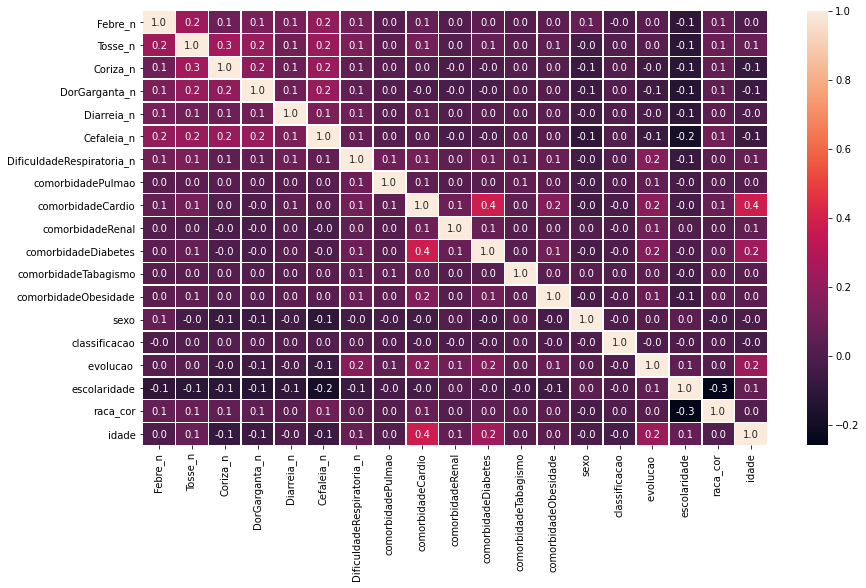

In [73]:
plt.figure(figsize=(14,8))
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

In [41]:
#confirmados por data
#sns.distplot(x=CovidES['dataNotificacao'],y=CovidES[CovidES['Classificacao']=='Confirmados'])
#sns.displot(x=CovidES['dataNotificacao'].unique(),y=CovidES[CovidES['Classificacao']=='Confirmados'],stat='count')

<AxesSubplot:xlabel='Classificacao', ylabel='count'>

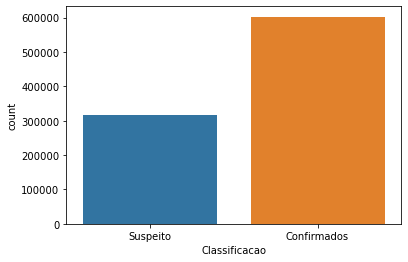

In [58]:
#dados de Classificação
sns.countplot(x='Classificacao',data=CovidES)

<AxesSubplot:xlabel='Evolucao', ylabel='count'>

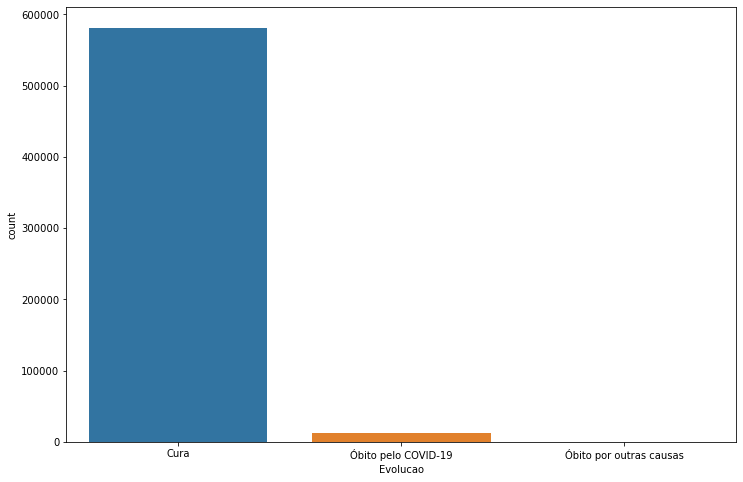

In [86]:
#Evolução
plt.figure(figsize=(12,8))
sns.countplot(x=CovidES['Evolucao'],data=CovidES)


<AxesSubplot:xlabel='RacaCor', ylabel='count'>

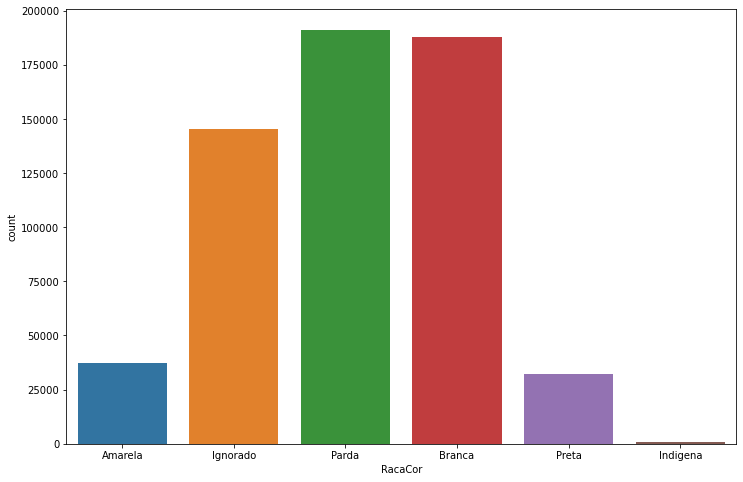

In [74]:
#Raça
plt.figure(figsize=(12,8))
sns.countplot(x=CovidES['RacaCor'],data=CovidES)

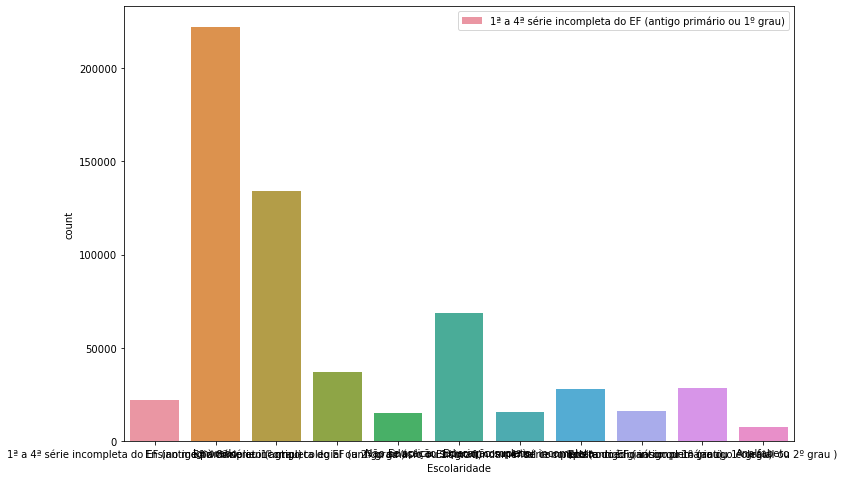

In [76]:
#Escolaridade
plt.figure(figsize=(12,8))
sns.countplot(x=CovidES['Escolaridade'],data=CovidES)
plt.legend(labels=CovidES['Escolaridade'].unique())

<AxesSubplot:xlabel='evolucao ', ylabel='count'>

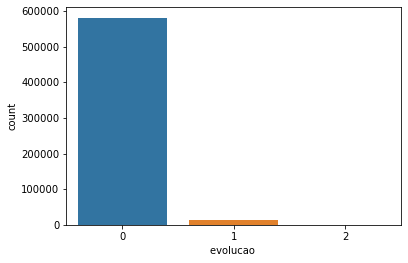

In [83]:
#Sintomas - Coriza
sns.countplot(x='evolucao ', data=CovidES)

<AxesSubplot:xlabel='escolaridade', ylabel='count'>

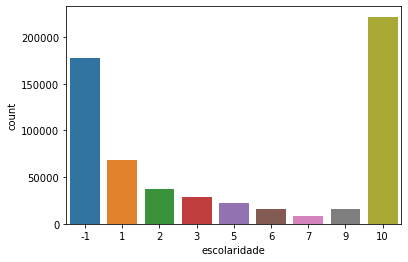

In [85]:
#Sintomas - Coriza
sns.countplot(x='escolaridade', data=CovidES)

In [92]:
CovidES[CovidES['Classificacao'] == '']

AttributeError: 'Series' object has no attribute 'count_value'

In [93]:
CovidES.columns

Index(['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade',
       'dataNotificacao', 'dataCadastro', 'dataDiagnostico', 'dataObito',
       'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n', 'Diarreia_n',
       'Cefaleia_n', 'DificuldadeRespiratoria_n', 'comorbidadePulmao',
       'comorbidadeCardio', 'comorbidadeRenal', 'comorbidadeDiabetes',
       'comorbidadeTabagismo', 'comorbidadeObesidade', 'sexo', 'classificacao',
       'evolucao ', 'escolaridade', 'raca_cor', 'idade'],
      dtype='object')

# Aplicando o modelo

In [226]:
#criando um novo dataset com valores padronizados de classificação
classifier_covid  = CovidES[CovidES['classificacao']==1]

In [227]:
#adicionando o mesmo numero de confirmados de forma aleatoria
classifier_covid = classifier_covid.append(CovidES[CovidES['classificacao'] == 0].sample(n=2736))

In [228]:
#validando os valores
classifier_covid['classificacao'].value_counts()

0    2736
1    2736
Name: classificacao, dtype: int64

In [104]:
classifier_covid.columns

Index(['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria',
       'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade',
       'dataNotificacao', 'dataCadastro', 'dataDiagnostico', 'dataObito',
       'Febre_n', 'Tosse_n', 'Coriza_n', 'DorGarganta_n', 'Diarreia_n',
       'Cefaleia_n', 'DificuldadeRespiratoria_n', 'comorbidadePulmao',
       'comorbidadeCardio', 'comorbidadeRenal', 'comorbidadeDiabetes',
       'comorbidadeTabagismo', 'comorbidadeObesidade', 'sexo', 'classificacao',
       'evolucao ', 'escolaridade', 'raca_cor', 'idade'],
      dtype='object')

In [229]:
#removendo colunas que nao serão utilizadas
classifier_covid.drop(columns=['Classificacao', 'Evolucao', 'Municipio', 'Bairro', 'FaixaEtaria','IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade'],inplace=True)

In [230]:
#excluindo outras colunas que nao serao utilizadas no modelo
classifier_covid.drop(columns=['evolucao ','dataObito','dataDiagnostico','dataCadastro','dataNotificacao','escolaridade','raca_cor'],inplace=True)

In [231]:
#removendo valores nulos
classifier_covid.dropna(inplace=True)

In [232]:
classifier_covid

,Febre_n,Tosse_n,Coriza_n,DorGarganta_n,Diarreia_n,Cefaleia_n,DificuldadeRespiratoria_n,comorbidadePulmao,comorbidadeCardio,comorbidadeRenal,comorbidadeDiabetes,comorbidadeTabagismo,comorbidadeObesidade,sexo,classificacao,idade
1875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,11
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,11
2109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,10
2219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,12
2896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094228,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,41
1358652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,25
176772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,83
836204,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,0,52


In [212]:
#importando o train test split - Cria as bases de teste e treino do modelo
from sklearn.model_selection import train_test_split

In [260]:
#criando as variaveis que receberão os valores de treino e test
x_train,x_test,y_train,y_test = train_test_split(classifier_covid.drop(columns=['classificacao']),classifier_covid['classificacao'],test_size=0.2,random_state=42)

In [261]:
x_train

,Febre_n,Tosse_n,Coriza_n,DorGarganta_n,Diarreia_n,Cefaleia_n,DificuldadeRespiratoria_n,comorbidadePulmao,comorbidadeCardio,comorbidadeRenal,comorbidadeDiabetes,comorbidadeTabagismo,comorbidadeObesidade,sexo,idade
2061114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,18
963752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
1856168,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,59
861884,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,49
875085,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,80
923587,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31
728928,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,41
2049417,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41


In [253]:
#importando a biblioteca Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

In [254]:
#criando uma variavel para o modelo
model = GaussianNB()

In [255]:
#treinando o modelo
model.fit(x_train,y_train)

GaussianNB()

In [256]:
#prevendo os valores com o modelo
predicted = model.predict(x_test)

In [257]:
#analisando o desempenho do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [258]:
# imprimindo o relatorio de classsificação
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       278
           1       0.60      0.67      0.63       269

    accuracy                           0.62       547
   macro avg       0.62      0.62      0.62       547
weighted avg       0.62      0.62      0.62       547



In [259]:
print(accuracy_score(y_test,predicted))

0.6179159049360147


In [155]:
model.var_smoothing

1e-09